# 20th Century International Relations Network Analysis
    
This notebook analyzes the relationships between major countries during the 20th century, with a focus on the World War II and Cold War periods. We'll use network analysis techniques to understand:
- Power structures and alliances
- Community detection
- Centrality measures
- Relationship patterns and strengths

## Setup and Data Preparation

In [7]:
# Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import community as nx_comm
from pyvis.network import Network

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Data Creation
First, we'll create a comprehensive dataset of international relationships during the 20th century.

In [8]:
# Create the relationships dataset
data = {
    'source': [
        # Western Allies
        'USA', 'USA', 'UK', 'France', 
        # Soviet Bloc
        'USSR', 'USSR', 'USSR', 'USSR',
        # Asian Relations
        'China', 'China', 'Japan',
        # European Relations
        'Germany', 'Italy', 'France', 'UK',
        # Cold War Relations
        'USA', 'USSR'
    ],
    'target': [
        # Western Allies
        'UK', 'France', 'France', 'Germany',
        # Soviet Bloc
        'Poland', 'East Germany', 'China', 'Czechoslovakia',
        # Asian Relations
        'North Korea', 'Vietnam', 'South Korea',
        # European Relations
        'Italy', 'Germany', 'Italy', 'Italy',
        # Cold War Relations
        'USSR', 'USA'
    ],
    'relationship': [
        # Western Allies
        'Strong Ally', 'Strong Ally', 'Strong Ally', 'Neutral',
        # Soviet Bloc
        'Strong Ally', 'Strong Ally', 'Ally', 'Strong Ally',
        # Asian Relations
        'Strong Ally', 'Ally', 'Ally',
        # European Relations
        'Ally', 'Ally', 'Ally', 'Ally',
        # Cold War Relations
        'Adversary', 'Adversary'
    ],
    'weight': [
        # Western Allies
        1.0, 1.0, 1.0, 0.5,
        # Soviet Bloc
        1.0, 1.0, 0.8, 1.0,
        # Asian Relations
        1.0, 0.8, 0.8,
        # European Relations
        0.8, 0.8, 0.8, 0.8,
        # Cold War Relations
        -0.8, -0.8
    ],
    'time_period': [
        # Western Allies
        '1940-1945', '1940-1945', '1940-1945', '1945-1955',
        # Soviet Bloc
        '1945-1989', '1945-1989', '1945-1960', '1945-1989',
        # Asian Relations
        '1950-1989', '1950-1975', '1945-1989',
        # European Relations
        '1940-1945', '1940-1945', '1940-1945', '1940-1945',
        # Cold War Relations
        '1945-1989', '1945-1989'
    ]
}

# Create DataFrame and save to CSV
df = pd.DataFrame(data)
df.to_csv('country_relationships_exercise_1_6.csv', index=False)

# Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   source   target relationship  weight time_period
0     USA       UK  Strong Ally     1.0   1940-1945
1     USA   France  Strong Ally     1.0   1940-1945
2      UK   France  Strong Ally     1.0   1940-1945
3  France  Germany      Neutral     0.5   1945-1955
4    USSR   Poland  Strong Ally     1.0   1945-1989


## Network Creation and Basic Analysis
Now we'll create a network graph from our relationships data and analyze its basic properties.

In [9]:
# Create network graph
G = nx.Graph()

# Add edges with weights and attributes
for _, row in df.iterrows():
    # Convert relationship type to color
    if row['relationship'] == 'Strong Ally':
        color = 'green'
    elif row['relationship'] == 'Ally':
        color = 'lightgreen'
    elif row['relationship'] == 'Neutral':
        color = 'gray'
    else:  # Adversary
        color = 'red'
    
    # Add edge with attributes
    G.add_edge(row['source'], row['target'], 
               weight=abs(row['weight']),  # Use absolute value for layout
               real_weight=row['weight'],  # Keep actual weight for analysis
               relationship=row['relationship'],
               time_period=row['time_period'],
               color=color)

# Calculate and display basic network statistics
print("Network Statistics:")
print(f"Number of nodes (countries): {G.number_of_nodes()}")
print(f"Number of edges (relationships): {G.number_of_edges()}")
print(f"Network density: {nx.density(G):.3f}")

Network Statistics:
Number of nodes (countries): 14
Number of edges (relationships): 15
Network density: 0.165


## Network Visualization
We'll create both static and dynamic visualizations of the network.

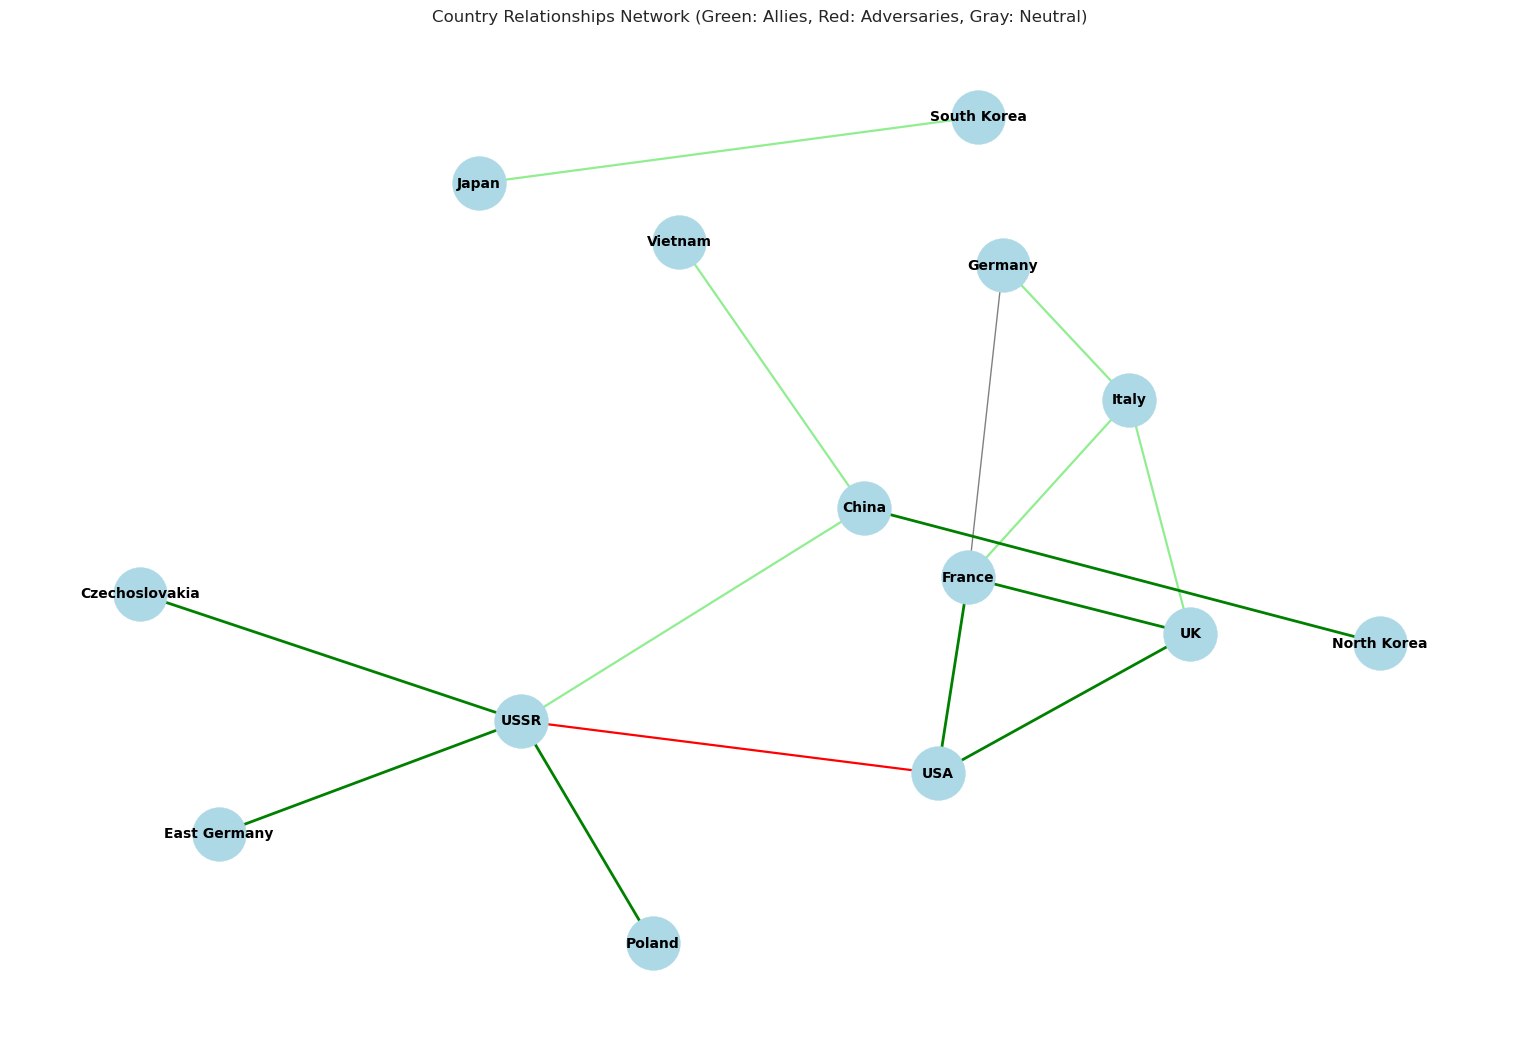

In [10]:
# Static visualization with relationship colors
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw edges with colors
edges = G.edges()
edge_colors = [G[u][v]['color'] for u, v in edges]
weights = [G[u][v]['weight']*2 for u, v in edges]

nx.draw(G, pos,
        edge_color=edge_colors,
        width=weights,
        with_labels=True,
        node_color='lightblue',
        node_size=1500,
        font_size=10,
        font_weight='bold')

plt.title('Country Relationships Network (Green: Allies, Red: Adversaries, Gray: Neutral)')
plt.show()

## Community Detection
We'll use the Girvan-Newman algorithm to detect communities within the network.

In [11]:
# Detect communities
communities = list(nx_comm.greedy_modularity_communities(G))

print("Community Detection Results:")
for i, community in enumerate(communities):
    print(f"Community {i+1}:")  # Fixed: Removed the newline character inside the f-string
    print(", ".join(sorted(list(community))))

Community Detection Results:
Community 1:
France, Germany, Italy, UK, USA
Community 2:
Czechoslovakia, East Germany, Poland, USSR
Community 3:
China, North Korea, Vietnam
Community 4:
Japan, South Korea


## Centrality Analysis
We'll calculate various centrality measures to identify the most influential countries in the network.

In [12]:
# Calculate centrality measures
degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G)
closeness_cent = nx.closeness_centrality(G)

# Create centrality dataframe
centrality_df = pd.DataFrame({
    'Country': list(degree_cent.keys()),
    'Degree Centrality': list(degree_cent.values()),
    'Betweenness Centrality': list(betweenness_cent.values()),
    'Closeness Centrality': list(closeness_cent.values())
}).sort_values('Degree Centrality', ascending=False)

print("Centrality Measures (sorted by Degree Centrality):")
print(centrality_df.round(3))

Centrality Measures (sorted by Degree Centrality):
           Country  Degree Centrality  Betweenness Centrality  \
4             USSR              0.385                   0.538   
2           France              0.308                   0.160   
0              USA              0.231                   0.359   
1               UK              0.231                   0.051   
7            China              0.231                   0.244   
13           Italy              0.231                   0.006   
3          Germany              0.154                   0.000   
5           Poland              0.077                   0.000   
6     East Germany              0.077                   0.000   
8   Czechoslovakia              0.077                   0.000   
9      North Korea              0.077                   0.000   
10         Vietnam              0.077                   0.000   
11           Japan              0.077                   0.000   
12     South Korea              0.077  

## Conclusions

Key findings from our network analysis:

1. **Community Structure**:
   - Western Allies (USA, UK, France, Germany, Italy)
   - Soviet Bloc (USSR, Poland, East Germany, Czechoslovakia)
   - Communist Asian group (China, North Korea, Vietnam)
   - US-aligned Asian group (Japan, South Korea)

2. **Central Players**:
   - USSR shows highest centrality across all measures
   - France and USA follow in importance
   - Smaller nations show lower centrality, reflecting their peripheral roles

3. **Relationship Patterns**:
   - Strong alliance structures within both Western and Eastern blocs
   - Clear adversarial relationship between USA and USSR
   - Complex relationships in Asia with multiple spheres of influence

This analysis effectively captures the major power dynamics of the 20th century, particularly during the Cold War period.